# Indice
#### 1. Word Cloud
###### 1.1 Word cloud su tweet
#### 2. Bigrammi e Trigrammi
#### 3. Sentiment Analysis

In [187]:
import twint
import pandas as pd


import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')


%matplotlib inline 

In [188]:
from wordcloud import WordCloud
import math
from operator import itemgetter
from PIL import Image 
import PIL 

In [189]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mir-9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
path = "../Fridayforfuture/edges.csv"
path_all = "../Fridayforfuture/fff.csv"
path_nodes = "../Fridayforfuture/nodes.csv"

In [191]:
df= pd.read_csv(path_all)
df.head(2)

,clean_tags,hashtags,date,user_id,username,name,tweet,language,mentions,urls,replies_count,retweets_count,likes_count,link,retweet,reply_to
0,"fossilfuels, wind, solar, green, hydrogen, ene...","['fossilfuels', 'wind', 'solar', 'green', 'hyd...",2022-07-10,59386332,arikring,Arik Ring - Energy Engineering Expert,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,"[{'screen_name': 'guytaur', 'name': 'scott. tr...",['https://reneweconomy.com.au/integrated-wind-...,2,54,59,https://twitter.com/arikring/status/1546251358...,False,"[{'screen_name': 'ProfStrachan', 'name': 'Prof..."
1,fridaysforfuture,['fridaysforfuture'],2022-07-10,1096766566279073792,parents4future,Parents For Future #EndFossilFuels,"Eltern wissen, wer hier dumm ist. #FridaysForF...",de,[],[],21,54,595,https://twitter.com/parents4future/status/1546...,False,[]


# Word Cloud

#### Word Cloud su tweet

Per fare la word cloud, seleziono un sub-df con tweet solo in inglese, perchè utlizzo un database per l'analisi in inglese

In [192]:
df_en=df[df['language']=='en']

In [193]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

In [194]:
stopwords = stopwords.words('english')
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if not word in stopwords
    ] #creo una lista con le parole piene

    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

In [195]:
df_en['cleaned_tweet']=df_en['tweet'].apply(lambda x: process_text(x))
df_en['tweet']=df_en['tweet'].apply(lambda x: remove_content(x))

In [185]:
temp=' '.join(df_en['cleaned_tweet'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(temp)

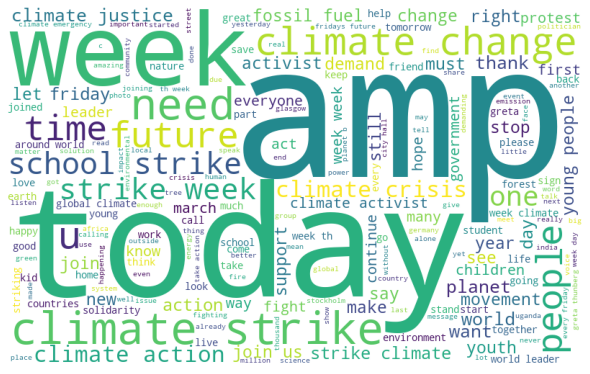

In [186]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

##### Bigrammi e trigrammi

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
tweet_list=df_en['cleaned_tweet']

In [87]:
#Si considerano i primi 20 ngrammi
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show()

In [88]:
#unigrammi
plot_topn(tweet_list, ngram_range=(1,1))

In [89]:
plot_topn(tweet_list, ngram_range=(2,2))

In [90]:
plot_topn(tweet_list, ngram_range=(3,3))

### Sentiment Analysis

Ho installato il pacchetto textblob per la sentiment Analysis

In [92]:
#pip install textblob

In [93]:
from textblob import TextBlob

In [196]:
df_en['sentiment']=df_en['cleaned_tweet'].apply(lambda x:TextBlob(x).sentiment[0])
df_en['subject']=df_en['cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df_en['polarity']=df_en['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')

In [197]:
fig=px.histogram(df_en[df_en['subject']>0.5], x='polarity', color='polarity')
fig.show()

#### Top modeling
Topic modeling is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. 